# Trapping Rain Water

Given non-negative integers representing an elevation map where the width of each bar is 1, compute how much water it can trap after raining. 

### Example 1:

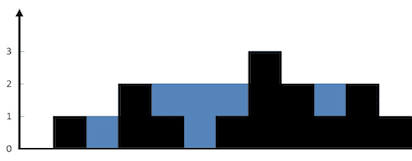

```
Input: height = [0,1,0,2,1,0,1,3,2,1,2,1]

Output: 6

Explanation: The above elevation map (black section) is represented by array [0,1,0,2,1,0,1,3,2,1,2,1]. In this case, 6 units of rain water (blue section) are being trapped.
```

### Example 2:

```
Input: height = [4,2,0,3,2,5]

Output: 9 
```

In [13]:
def trapping_rain_water(elevation_map):
    tot_rain = 0
    prev_high_border = 0
    # curr_rain = 0
    i = 0
    j = 0
    while i < len(elevation_map) - 1:
        if elevation_map[i] != 0:
            curr_rain = 0
            # Loop to find the next border equal or higher than the current
            for j in range(i + 1, len(elevation_map)):
                if elevation_map[j] >= elevation_map[i]:
                    if curr_rain != 0:
                        tot_rain += curr_rain
                        curr_rain = 0
                        i = j
                        break
                elif j == len(elevation_map) - 1:
                    curr_rain = 0
                    i += 1
                    break
                else:
                    curr_rain += elevation_map[i] - elevation_map[j]       
        else:
            i += 1  
    return tot_rain

elevation_map = [0,1,0,2,1,0,1,3,2,1,2,1]
print(trapping_rain_water(elevation_map)) 
elevation_map = [4,2,0,3,2,5]
print(trapping_rain_water(elevation_map))
elevation_map = [0,5,4,3,2,3]
print(trapping_rain_water(elevation_map))

6
9
1


## Solution

For any position in the array, the amount of water that can be trapped above that bar depends on two things: the tallest bar somewhere to its left and the tallest bas somewhere to its right.

If the tallest bar on the left is 5 units  and the tallest on the right is 7 units, the water at this position can only go up to 5 units high. If the water goes above this level, it would spill over the left side. Once we know this water level, we subtract the current bar's height to get the actual water trapped at that position. 

We'll maintain two pointers, one starting from the left end and one from the right end of the array. We'll also keep track of the maximum height seen so far from both sides. 

At each step, we move the pointer with the smaller maximum height. This works because when we know one side has smaller maximum, we can immediately calculate the water at that position. We don't need to check further because we've already found the limiting factor for the water level there. 

This way, we can calculate water trapped as we go, moving teh appropriate pointer inward after each calculation.

The time complexity of this solution $O(n)$, where $n$ is the length of the height array.

In [12]:
def trap(height):
    # Initialize pointers and variables
    left, right = 0, len(height) - 1
    left_max = right_max = 0
    water = 0

    # Process while pointers don't meet
    while left < right:
        # Process the smaller height first
        if height[left] < height[right]:
            # Update left max height
            if height[left] >= left_max:
                left_max = height[left]
            # Add trapped water
            else:
                water += left_max - height[left]
            left += 1
        else:
            # Update right max height
            if height[right] >= right_max:
                right_max = height[right]
            # Add trapped
            else:
                water += right_max - height[right]
            right -= 1

    return water

elevation_map = [0,1,0,2,1,0,1,3,2,1,2,1]
print(trap(elevation_map)) 
elevation_map = [4,2,0,3,2,5]
print(trap(elevation_map))
elevation_map = [0,5,4,3,2,3]
print(trap(elevation_map))

6
9
1
